In [ ]:
#provision required libraries
import pandas as pd
import numpy as np

In [ ]:
# Use the upload widget to upload files
from google.colab import files
uploaded = files.upload()

Saving Nat_Gas.csv to Nat_Gas.csv


In [ ]:
# read the data frame
df = pd.read_csv('Nat_Gas.csv')

Let's get a snapshot of the data frame to get a sense of its structural layout.

In [ ]:
# Display the first few rows of the dataframe
print(df.head(10))

      Dates  Prices
0  10/31/20   10.10
1  11/30/20   10.30
2  12/31/20   11.00
3   1/31/21   10.90
4   2/28/21   10.90
5   3/31/21   10.90
6   4/30/21   10.40
7   5/31/21    9.84
8   6/30/21   10.00
9   7/31/21   10.10


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Dates     0
Prices    0
dtype: int64

Our dataframe has zero missing values.

In [ ]:
#get df dimension
df.shape

(48, 2)

As shown above, our data frame has 48 observations across two variables - Date and Prices.

Next we implement some preliminary descriptive statistics.

In [ ]:
print(df.columns)

Index(['Dates', 'Prices'], dtype='object')


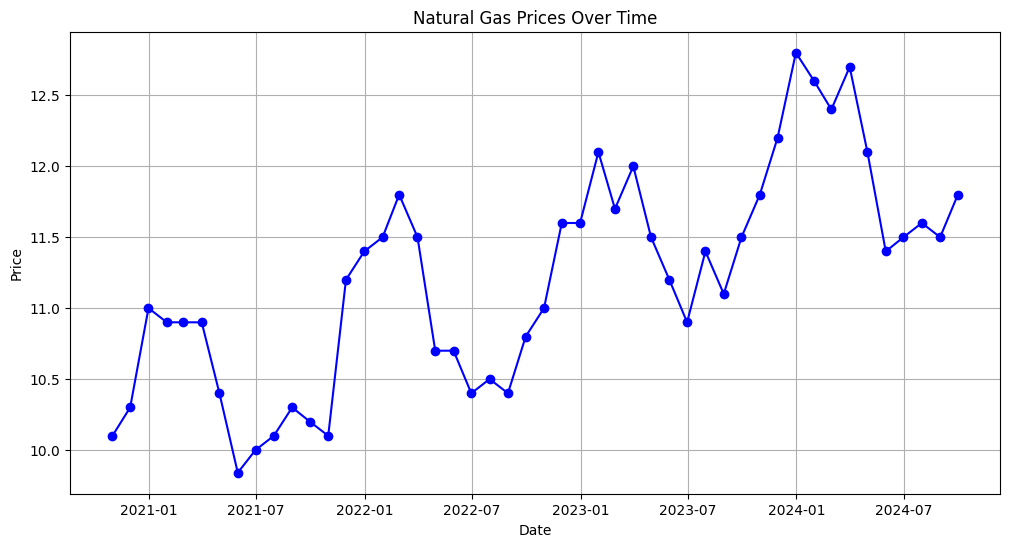

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [ ]:
# provision required libraries
import matplotlib.pyplot as plt

# Convert 'Dates' to datetime objects and set as index
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)

# Summary Statistics
summary_stats = df.describe()

# Plotting the time series of prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], color='blue', marker='o')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

(summary_stats)


*Next* we start by analyzing the data for any seasonal trends and then move on to modeling and extrapolation.

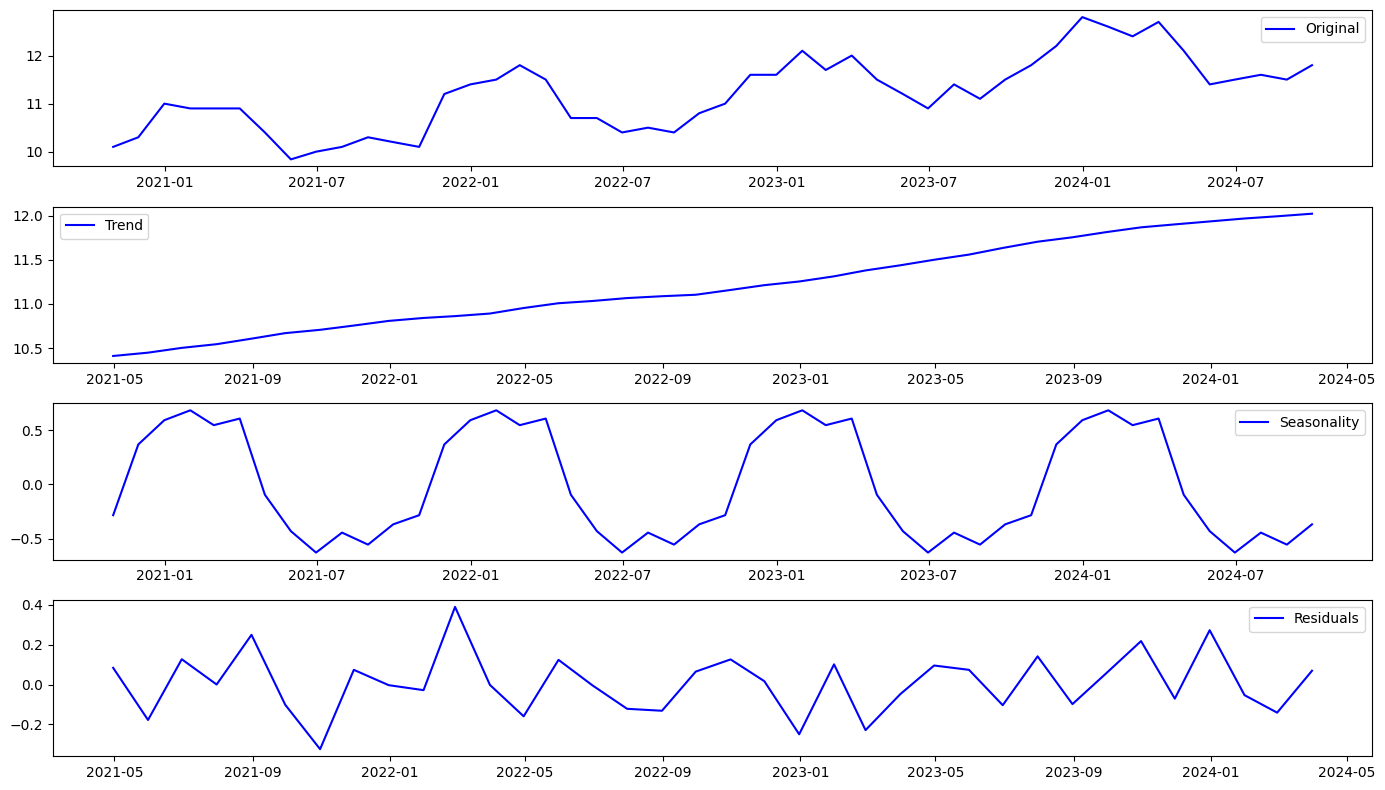

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series to find patterns such as trend and seasonality based on a monthly format
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)

# Plotting the components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df['Prices'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
import pyforest

The decomposition of the time series data into its components shows us:

Original Series: The actual natural gas prices over time, showing some fluctuations.

Trend: This captures the long-term progression of prices. If there's an overall increase or decrease over the years, it would show here. The plot indicates some variation over time, but without a clear long-term upward or downward trend.

Seasonality: This represents patterns that repeat at regular intervals. In the context of natural gas prices, this might reflect seasonal variations in demand or supply. From the plot, while there are some fluctuations that might suggest seasonality, it doesn't seem to be strongly pronounced or regular.

Residuals: These are what's left after the trend and seasonality have been removed from the original series. Ideally, these should be random noise if the model has captured all the systematic information.